In [25]:
!pip install sentence_transformers

Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
s3fs 2023.3.0 requires fsspec==2023.3.0, but you have fsspec 2024.3.1 which is incompatible.



  Obtaining dependency information for sentence_transformers from https://files.pythonhosted.org/packages/68/0d/27475988a3daade7516ea02dbc607b57d4a30f01bb49614a6430e76685c2/sentence_transformers-2.5.1-py3-none-any.whl.metadata
  Obtaining dependency information for transformers<5.0.0,>=4.32.0 from https://files.pythonhosted.org/packages/b6/4d/fbe6d89fde59d8107f0a02816c4ac4542a8f9a85559fdf33c68282affcc1/transformers-4.38.2-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/130.7 kB ? eta -:--:--
     -------------------------------------- 130.7/130.7 kB 3.9 MB/s eta 0:00:00
  Obtaining dependency information for torch>=1.11.0 from https://files.pythonhosted.org/packages/59/1f/4975d1ab3ed2244053876321ef65bc02935daed67da76c6e7d65900772a3/torch-2.2.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for huggingface-hub>=0.15.1 from https://files.pythonhosted.org/packages/ab/28/d4b691840d73126d4c9845f8a22dad033ac872509b6d3a0d93b456eef424/hugging

In [35]:
!pip install embeddings

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for embeddings from https://files.pythonhosted.org/packages/bd/da/55d07bcdaac48b293aa88d797be3d89f6b960e2f71565dd64204fa0b6a4f/embeddings-0.0.8-py3-none-any.whl.metadata


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import networkx as nx
from networkx.algorithms import community
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

### [EJERCICIO 1] Aplicación de citas. ¿Quiénes serán los siguientes pretendientes?

Una aplicación de citas nos ha solicitado que desarrollemos un sistema de recomendación. En él, debemos proponer las cuatro personas que mayor probabilidad tengan de terminar teniendo una cita. Para ello, nos proponen el siguiente conjunto de datos: datasetCitas.csv. En él, se pueden ver los números identificadores de usuario, así como características que los describen, tales como: si la persona está soltera, el sexo de la persona, la orientación sexual, si siguen alguna dieta o si beben o fuman, entre otras

In [2]:
citas = pd.read_csv("datasets/datasetCitas.csv")

In [3]:
citas

,age,status,sex,orientation,body_type,diet,drinks,drugs,height,smokes,user
0,22,single,m,straight,a little extra,anything,socially,never,75.0,sometimes,20471OC
1,35,single,m,straight,average,other,often,sometimes,70.0,no,90676DD
2,38,available,m,straight,thin,anything,socially,NaN,68.0,no,55184RY
3,23,single,m,straight,thin,vegetarian,socially,NaN,71.0,no,47777YP
4,29,single,m,straight,athletic,NaN,socially,never,66.0,no,56729ZW
...,...,...,...,...,...,...,...,...,...,...,...
59941,59,single,f,straight,NaN,NaN,socially,never,62.0,no,51520QL
59942,24,single,m,straight,fit,anything,often,sometimes,72.0,no,72338CT
59943,42,single,m,straight,average,anything,rarely,never,71.0,no,69212MR
59944,27,single,m,straight,athletic,anything,socially,often,73.0,sometimes,28502HS


#### a) Realizar un análisis exploratorio de los datos. ¿Qué información contienen nuestras variables? Propón hipótesis y resuélvelas empleando técnicas de análisis exploratorio de datos (visual y/o estadísticas)

In [4]:
#Mostramos las primeras filas del conjunto de datos
citas.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,height,smokes,user
0,22,single,m,straight,a little extra,anything,socially,never,75.0,sometimes,20471OC
1,35,single,m,straight,average,other,often,sometimes,70.0,no,90676DD
2,38,available,m,straight,thin,anything,socially,NaN,68.0,no,55184RY
3,23,single,m,straight,thin,vegetarian,socially,NaN,71.0,no,47777YP
4,29,single,m,straight,athletic,NaN,socially,never,66.0,no,56729ZW


In [5]:
#Vemos el tamaño 
citas.shape

(59946, 11)

In [6]:
#Obtenemos información del dataset
citas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   height       59943 non-null  float64
 9   smokes       54434 non-null  object 
 10  user         59946 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 5.0+ MB


In [7]:
#Valores faltantes 
citas.isna().sum()

age                0
status             0
sex                0
orientation        0
body_type       5296
diet           24395
drinks          2985
drugs          14080
height             3
smokes          5512
user               0
dtype: int64

In [8]:
#Estadísticas
citas.describe(include="all")

,age,status,sex,orientation,body_type,diet,drinks,drugs,height,smokes,user
count,59946.000000,59946,59946,59946,54650,35551,56961,45866,59943.000000,54434,59946
unique,NaN,5,2,3,12,6,4,3,NaN,4,59920
top,NaN,single,m,straight,average,anything,socially,never,NaN,no,67411AC
freq,NaN,55697,35829,51606,14652,27881,41780,37724,NaN,43896,2
mean,32.340290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.295281,NaN,NaN
std,9.452779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.994803,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.000000,NaN,NaN
50%,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.000000,NaN,NaN
75%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.000000,NaN,NaN


Las personas solteras tienen una mayor frecuencia de citas en comparación con las personas en relaciones comprometidas

Las personas que beben socialmente tienen una mayor probabilidad de tener citas en comparación con las personas que no beben

El hábito de fumar afecta negativamente la probabilidad de tener una cita

Hay una mayor proporción de hombres que se identifican como homosexuales y una mayor proporción de mujeres que se identifican como bisexuales en comparación con otras orientaciones sexuales

El tipo de cuerpo influye en la probabilidad de tener una cita

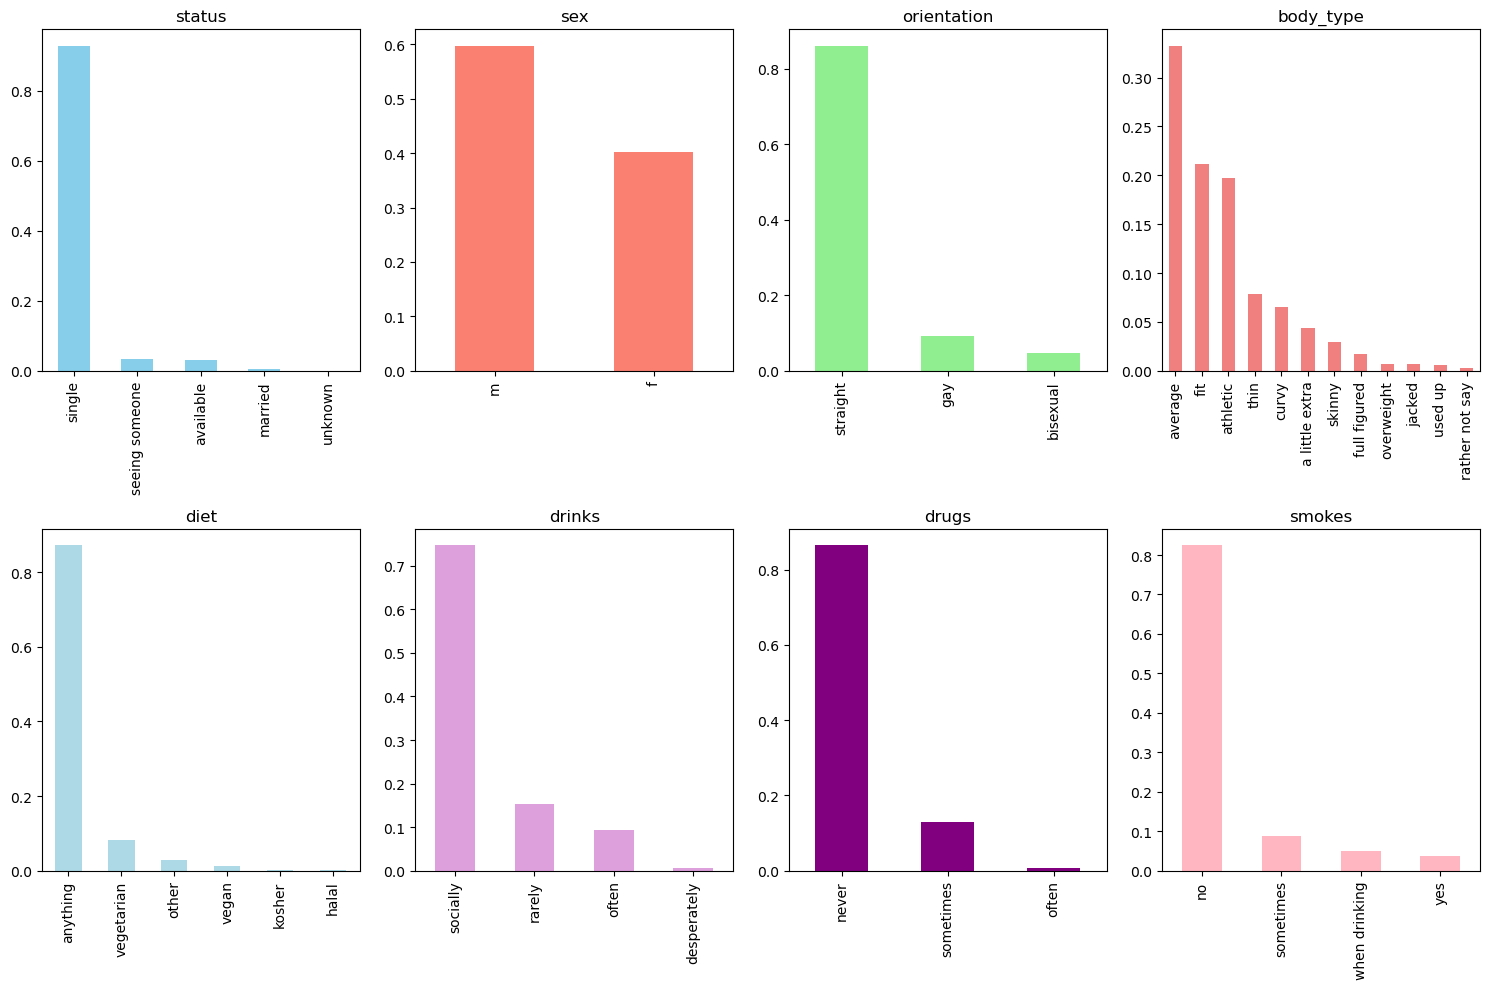

In [19]:
#Visualización de las variables categóricas
plt.figure(figsize = (15, 10))
plt.subplot(2, 4, 1)
citas['status'].value_counts(normalize = True).plot.bar(title = 'status', color='skyblue');
plt.subplot(2, 4, 2)
citas['sex'].value_counts(normalize = True).plot.bar(title = 'sex', color='salmon');
plt.subplot(2, 4, 3)
citas['orientation'].value_counts(normalize = True).plot.bar(title = 'orientation', color='lightgreen');
plt.subplot(2, 4, 4)
citas['body_type'].value_counts(normalize = True).plot.bar(title = 'body_type', color='lightcoral');
plt.subplot(2, 4, 5)
citas['diet'].value_counts(normalize = True).plot.bar(title = 'diet', color='lightblue');
plt.subplot(2, 4, 6)
citas['drinks'].value_counts(normalize = True).plot.bar(title = 'drinks', color='plum');
plt.subplot(2, 4, 7)
citas['drugs'].value_counts(normalize = True).plot.bar(title = 'drugs', color='purple');
plt.subplot(2, 4, 8)
citas['smokes'].value_counts(normalize = True).plot.bar(title = 'smokes', color='lightpink');
plt.tight_layout()


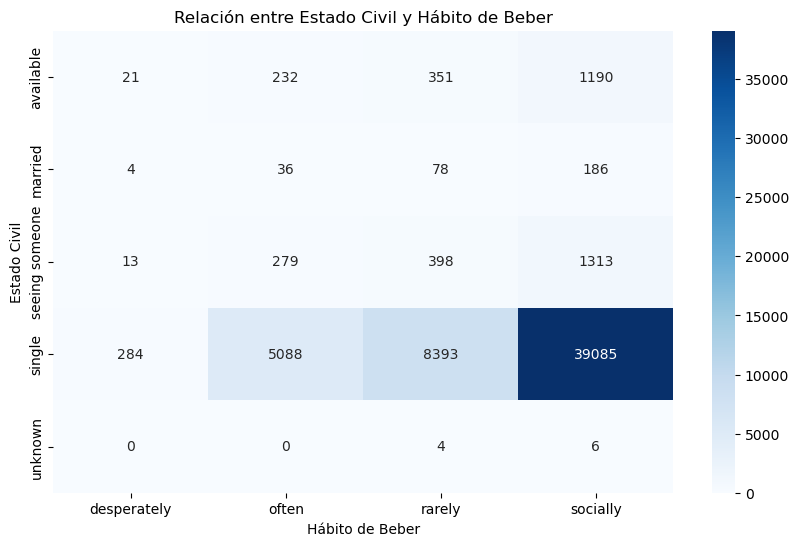

In [10]:
# Tabla de Contingencia Estado Civil vs Hábito de Beber
contingencia = pd.crosstab(citas['status'], citas['drinks'])
plt.figure(figsize=(10, 6))
sns.heatmap(contingencia, annot=True, fmt='d', cmap='Blues')
plt.title('Relación entre Estado Civil y Hábito de Beber')
plt.xlabel('Hábito de Beber')
plt.ylabel('Estado Civil')
plt.show()

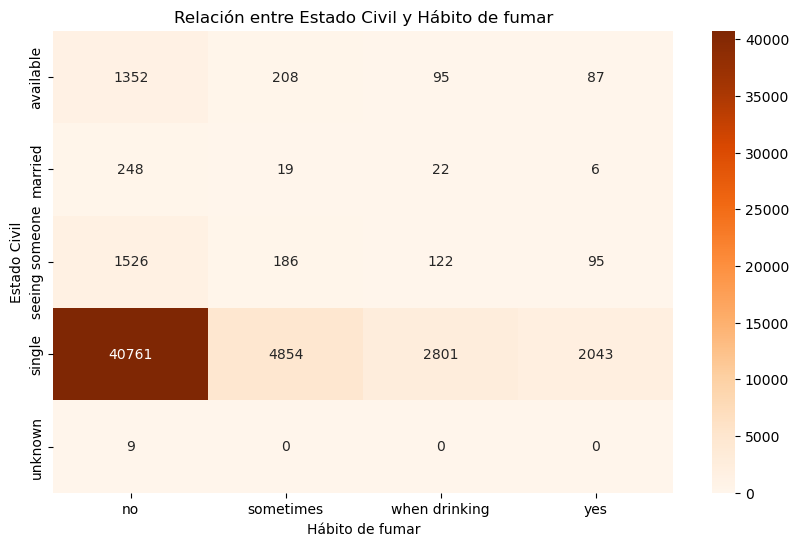

In [11]:
# Tabla de Contingencia Estado Civil vs Hábito de fumar
contingencia = pd.crosstab(citas['status'], citas['smokes'])
plt.figure(figsize=(10, 6))
sns.heatmap(contingencia, annot=True, fmt='d', cmap='Oranges')
plt.title('Relación entre Estado Civil y Hábito de fumar')
plt.xlabel('Hábito de fumar')
plt.ylabel('Estado Civil')
plt.show()

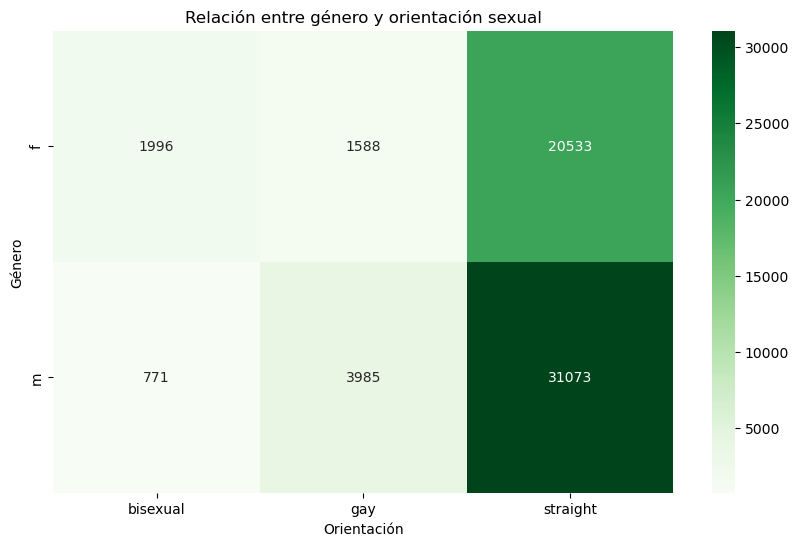

In [12]:
# Tabla de Contingencia Género y orientación sexual
contingencia = pd.crosstab(citas['sex'], citas['orientation'])
plt.figure(figsize=(10, 6))
sns.heatmap(contingencia, annot=True, fmt='d', cmap='Greens')
plt.title('Relación entre género y orientación sexual')
plt.xlabel('Orientación')
plt.ylabel('Género')
plt.show()

* Casi el 90% de los usuarios está soltero
* Hay más hombres que mujeres
* Más del 80% se considera heterosexual, habiendo más hombres homosexuales y mas mujeres bisexuales
* La mayor parte de los usuarios se describen como promedios, en forma o deportistas
* Más del 70% de los usuarios bebe de forma social
* Prácticamente el 80% de los usuarios no fuma

 Las personas más jóvenes tienen una mayor probabilidad de tener citas que las personas mayores
 
 Existe una preferencia general por las alturas promedio en las citas
 
 Las personas tienden a preferir parejas con una altura similar a la suya en las citas

In [13]:
citas['height_cm'] = citas['height'] * 2.54

<Axes: xlabel='height_cm', ylabel='Density'>

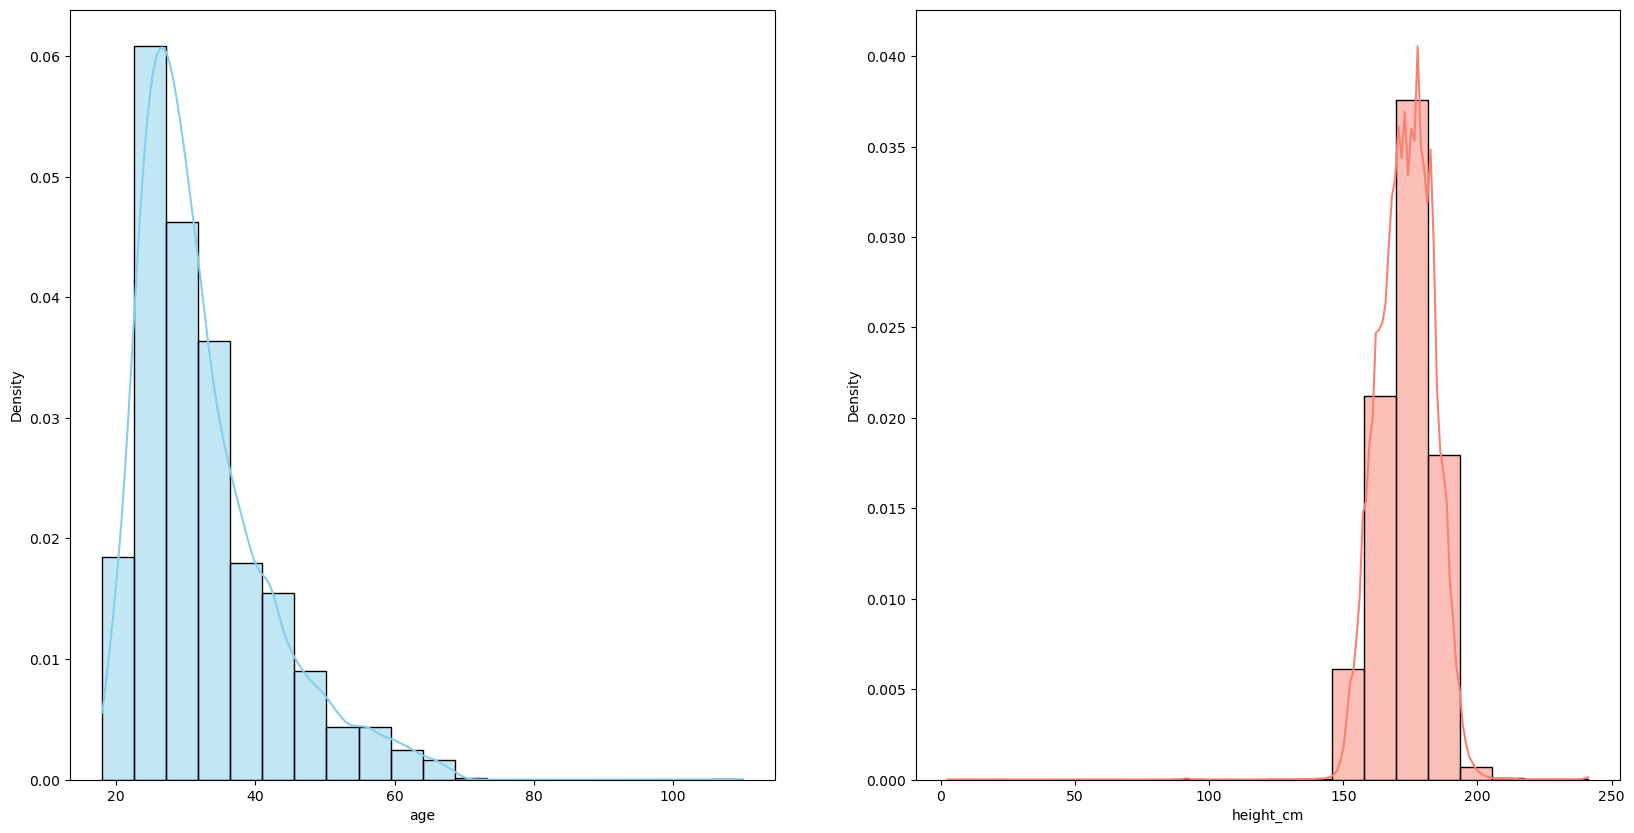

In [14]:
#Visualización variables numéricas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
sns.histplot(data=citas['age'], bins=20, kde=True, stat='density', ax=ax1, color='skyblue')
sns.histplot(data=citas['height_cm'], bins=20, kde=True, stat='density', ax=ax2, color='salmon')

* La mayor marte de los usuarios se encuentra entre los 25 y 30 años.
* Le altura media se encuentra entre 165cm y 180cm

#### b) Realiza la limpieza de datos. Pero ojo, ¡no puedes eliminar a ningún usuario de la aplicación!

In [7]:
faltantes = citas.isna().sum().sort_values(ascending=False)
faltantes

diet           24395
drugs          14080
smokes          5512
body_type       5296
drinks          2985
height             3
age                0
status             0
sex                0
orientation        0
user               0
dtype: int64

In [8]:
# Imputamos valores faltantes en columnas clave con métodos apropiados
# Para columnas numéricas, usamos la mediana
columnas_numericas = citas.select_dtypes(include=['float64', 'int64']).columns
for col in columnas_numericas:
    citas[col].fillna(citas[col].median(), inplace=True)

# Para columnas categóricas, usamos la moda
columnas_categoricas = citas.select_dtypes(include=['object']).columns
for col in columnas_categoricas:
    citas[col].fillna(citas[col].mode()[0], inplace=True)

# Revisar el resultado después de las modificaciones
citas.isnull().sum().sort_values(ascending=False)

age            0
status         0
sex            0
orientation    0
body_type      0
diet           0
drinks         0
drugs          0
height         0
smokes         0
user           0
dtype: int64

In [9]:
citas.to_csv("datasets/datasetCitas_limpio.csv", index=False)

In [10]:
citas

,age,status,sex,orientation,body_type,diet,drinks,drugs,height,smokes,user
0,22,single,m,straight,a little extra,anything,socially,never,75.0,sometimes,20471OC
1,35,single,m,straight,average,other,often,sometimes,70.0,no,90676DD
2,38,available,m,straight,thin,anything,socially,never,68.0,no,55184RY
3,23,single,m,straight,thin,vegetarian,socially,never,71.0,no,47777YP
4,29,single,m,straight,athletic,anything,socially,never,66.0,no,56729ZW
...,...,...,...,...,...,...,...,...,...,...,...
59941,59,single,f,straight,average,anything,socially,never,62.0,no,51520QL
59942,24,single,m,straight,fit,anything,often,sometimes,72.0,no,72338CT
59943,42,single,m,straight,average,anything,rarely,never,71.0,no,69212MR
59944,27,single,m,straight,athletic,anything,socially,often,73.0,sometimes,28502HS


In [11]:
#Valores únicos para las columnas de tipo objeto
for column in citas.select_dtypes(include=['object']):
    print(citas[column].value_counts())

single            55697
seeing someone     2064
available          1865
married             310
unknown              10
Name: status, dtype: int64
m    35829
f    24117
Name: sex, dtype: int64
straight    51606
gay          5573
bisexual     2767
Name: orientation, dtype: int64
average           19948
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64
anything      52276
vegetarian     4986
other          1790
vegan           702
kosher          115
halal            77
Name: diet, dtype: int64
socially       44765
rarely          9224
often           5635
desperately      322
Name: drinks, dtype: int64
never        51804
sometimes     7732
often          410
Name: drugs, dtype: int64
no               49408
sometimes         5267
when drinking     

In [12]:
usuarios_repetidos = citas[citas.duplicated(subset='user', keep=False)]

In [13]:
datos_usuarios_repetidos = citas[citas['user'].isin(usuarios_repetidos['user'])]
datos_usuarios_repetidos.sort_values(by="user")

,age,status,sex,orientation,body_type,diet,drinks,drugs,height,smokes,user
53644,49,single,f,straight,average,anything,socially,never,64.0,no,12092RL
37917,27,available,m,straight,skinny,anything,socially,never,66.0,when drinking,12092RL
6111,30,single,m,straight,average,anything,socially,never,67.0,no,15205IV
26161,31,single,m,straight,fit,anything,socially,never,70.0,no,15205IV
7785,28,single,m,straight,athletic,anything,socially,never,69.0,no,19368GV
51428,41,single,f,straight,average,anything,socially,never,72.0,no,19368GV
2505,29,single,f,bisexual,athletic,anything,rarely,sometimes,72.0,sometimes,24027NA
42013,32,single,m,straight,fit,anything,socially,never,70.0,no,24027NA
43773,26,single,f,straight,curvy,anything,socially,never,62.0,no,28291IQ
33960,39,single,m,straight,average,anything,socially,never,74.0,no,28291IQ


Aunque haya identificadores repetidos, no quiere decir que existan registros duplicados. Esto se puede deber a que haya usuarios que hayan actualizado su perfil o si los datos se han metido de forma manual es posible que el usuario se haya repetido y se hayan cambiado datos. Trataremos a estos usuarios como una característica normal del conjunto de datos

In [45]:
# Seleccionar las variables numéricas
columnas_numericas = ['age', 'height_cm']

In [24]:
ri = citas[columnas_numericas].quantile(0.75) - citas[columnas_numericas].quantile(0.25)

# Calculamos los límites para valores atípicos
limite_superior = citas[columnas_numericas].quantile(0.75) + 1.5 * ri
limite_inferior = citas[columnas_numericas].quantile(0.25) - 1.5 * ri

# Calculamos los límites para valores atípicos severos
limite_superior_sev = citas[columnas_numericas].quantile(0.75) + 3 * ri
limite_inferior_sev = citas[columnas_numericas].quantile(0.25) - 3 * ri

# Contamos el número de valores atípicos
num_outliers = ((citas[columnas_numericas] > limite_superior) | (citas[columnas_numericas] < limite_inferior)).sum()
num_outliers_sev = ((citas[columnas_numericas] > limite_superior_sev) | (citas[columnas_numericas] < limite_inferior_sev)).sum()

# Resultados
outliers = pd.DataFrame({
    'RI': ri,
    'high_outlier': limite_superior,
    'low_outlier': limite_inferior,
    'high_outlier_severity': limite_superior_sev,
    'low_outlier_severity': limite_inferior_sev,
    'number_outliers': num_outliers,
    'number_outliers_severity': num_outliers_sev
})

In [25]:
outliers = outliers.transpose()
outliers

,age,height_cm
RI,11.0,12.70
high_outlier,53.5,199.39
low_outlier,9.5,148.59
high_outlier_severity,70.0,218.44
low_outlier_severity,-7.0,129.54
number_outliers,2638.0,285.00
number_outliers_severity,2.0,64.00


Encontramos 2 registros con valores de edad severos ya que hay algún usuario con una edad superior a 70. Y hay 64 registros con valores de altura deberos esto se debe a que hay usuarios con una altura mayor o menor a la franja reflejada

In [26]:
#codificación variables categóricas
columnas_categoricas = ['status', 'sex', 'orientation', 'body_type', 'diet', 'drinks', 'drugs', 'smokes']
citas = pd.get_dummies(citas, columns=columnas_categoricas, drop_first=True)

In [27]:
citas.head()

,age,height,user,height_cm,status_married,status_seeing someone,status_single,status_unknown,sex_m,orientation_gay,...,diet_vegan,diet_vegetarian,drinks_often,drinks_rarely,drinks_socially,drugs_often,drugs_sometimes,smokes_sometimes,smokes_when drinking,smokes_yes
0,22,75.0,20471OC,190.50,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
1,35,70.0,90676DD,177.80,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2,38,68.0,55184RY,172.72,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,23,71.0,47777YP,180.34,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4,29,66.0,56729ZW,167.64,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [28]:
#Normalizar variables numericas
columnas_numericas = ['age', 'height_cm']
scaler = StandardScaler()
citas[columnas_numericas] = scaler.fit_transform(citas[columnas_numericas])

In [29]:
citas.head()

,age,height,user,height_cm,status_married,status_seeing someone,status_single,status_unknown,sex_m,orientation_gay,...,diet_vegan,diet_vegetarian,drinks_often,drinks_rarely,drinks_socially,drugs_often,drugs_sometimes,smokes_sometimes,smokes_when drinking,smokes_yes
0,-1.093898,75.0,20471OC,1.678420,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
1,0.281370,70.0,90676DD,0.426752,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2,0.598740,68.0,55184RY,-0.073915,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,-0.988108,71.0,47777YP,0.677086,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4,-0.353369,66.0,56729ZW,-0.574582,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


#### c) Implementa un sistema recomendador para el que, dado el identificador de un usuario, obtengamos aquellos perfiles con mayor propensión a la cita

In [30]:
#Transformamos el dataset a matriz de arrays (que luego utilizaremos para generar embeddings)
text_data = np.array(citas.user)

In [31]:
#Descargamos modelo pre-entrenado 
model = SentenceTransformer('distilbert-base-nli-mean-tokens')

In [32]:
#Generamos embeddings para cada descripción de la serie
embeddings = model.encode(text_data, show_progress_bar=True)

Batches:   0%|          | 0/1874 [00:00<?, ?it/s]

In [33]:
embeddings.shape

(59946, 768)

In [34]:
embeddings

array([[-0.8300182 , -0.19184284,  1.0452548 , ..., -0.28335968,
         0.20081256, -0.46663952],
       [-0.5522441 , -0.42404538,  0.57263696, ..., -0.9340034 ,
        -0.37084523, -0.6701976 ],
       [-0.52915555, -0.17683665,  0.27212954, ..., -0.8362794 ,
         0.12717289,  0.12203168],
       ...,
       [-0.5744149 , -0.4158098 ,  0.36721638, ..., -0.39642188,
         0.13836332, -0.4359792 ],
       [-0.32787788, -0.36287788,  0.6688679 , ..., -0.8668332 ,
         0.04226781, -0.7063586 ],
       [-0.24481812, -0.30641153,  0.91923296, ..., -0.6109615 ,
         0.6605935 , -0.6898316 ]], dtype=float32)

In [35]:
# Seleccionar solo los primeros 10000 datos
embeddings_subset = embeddings[:10000]

In [36]:
# Calcular la matriz de similitud coseno entre los embeddings
cos_sim_data = pd.DataFrame(cosine_similarity(embeddings_subset))

In [37]:
cos_sim_data.shape

(10000, 10000)

In [38]:
cos_sim_data

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1.000000,0.636385,0.716379,0.784297,0.728412,0.726859,0.760997,0.674842,0.669170,0.774058,...,0.651919,0.723368,0.727652,0.788779,0.716431,0.672864,0.721168,0.645880,0.630105,0.754821
1,0.636385,1.000000,0.741035,0.695874,0.779532,0.681335,0.796028,0.723639,0.786450,0.729907,...,0.699216,0.707785,0.726902,0.728062,0.820917,0.920051,0.605691,0.770531,0.784127,0.701866
2,0.716379,0.741035,1.000000,0.878612,0.909662,0.822558,0.716934,0.806531,0.829629,0.738451,...,0.724392,0.850476,0.799924,0.754071,0.868870,0.747395,0.681653,0.856349,0.770139,0.838443
3,0.784297,0.695874,0.878612,1.000000,0.856717,0.798202,0.702609,0.744992,0.788833,0.785081,...,0.704120,0.768073,0.832516,0.806952,0.801607,0.710371,0.745212,0.752700,0.728876,0.834635
4,0.728412,0.779532,0.909662,0.856717,1.000000,0.881161,0.754228,0.827529,0.865672,0.795831,...,0.732852,0.847379,0.839354,0.802933,0.919842,0.763740,0.721329,0.840908,0.787331,0.853774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.672864,0.920051,0.747395,0.710371,0.763740,0.703285,0.817913,0.704819,0.778311,0.755617,...,0.677986,0.745599,0.681344,0.703707,0.794472,1.000000,0.577219,0.767598,0.730119,0.724259
9996,0.721168,0.605691,0.681653,0.745212,0.721329,0.725313,0.688608,0.715810,0.696679,0.740941,...,0.756129,0.659610,0.791909,0.813293,0.737639,0.577219,1.000000,0.640630,0.690221,0.773296
9997,0.645880,0.770531,0.856349,0.752700,0.840908,0.747220,0.648320,0.852075,0.826862,0.677885,...,0.724729,0.835509,0.719139,0.730028,0.808458,0.767598,0.640630,1.000000,0.762591,0.794346
9998,0.630105,0.784127,0.770139,0.728876,0.787331,0.742061,0.690396,0.727834,0.699738,0.751923,...,0.686463,0.662700,0.775793,0.734970,0.795600,0.730119,0.690221,0.762591,1.000000,0.705424


In [39]:
def recomendar_perfiles(usuario_id, n=10):
    # Obtener el índice del usuario en el conjunto de datos
    indice_usuario = citas.index[citas['user'] == usuario_id].tolist()[0]

    # Obtener las similitudes del usuario con todos los demás usuarios
    similitudes_usuario = cos_sim_data.iloc[indice_usuario]

    # Obtener los índices de los usuarios más similares (excluyendo al usuario de referencia)
    indices_similares = similitudes_usuario.argsort()[-n-1:-1][::-1]

    # Obtener los identificadores de usuario de los perfiles recomendados
    perfiles_recomendados = citas.loc[indices_similares, 'user'].tolist()

    return perfiles_recomendados

In [40]:
#Ejemplo de uso
usuario_id = '20471OC'

In [41]:
perfiles_recomendados = recomendar_perfiles(usuario_id)

In [42]:
perfiles_recomendados

['20407BU',
 '20474RP',
 '20486ML',
 '20430IP',
 '20584AK',
 '20584KE',
 '20454FY',
 '20428NY',
 '20345ED',
 '20382OL']